## Imports

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from copy import deepcopy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.utils import resample

## Dataset

In [116]:
data = pd.read_csv('data/diabetes.csv')

In [117]:
data.info() # Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [118]:
data.describe()  # Summary statistics

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [119]:
data.isnull().sum()  # Check for missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## EDA

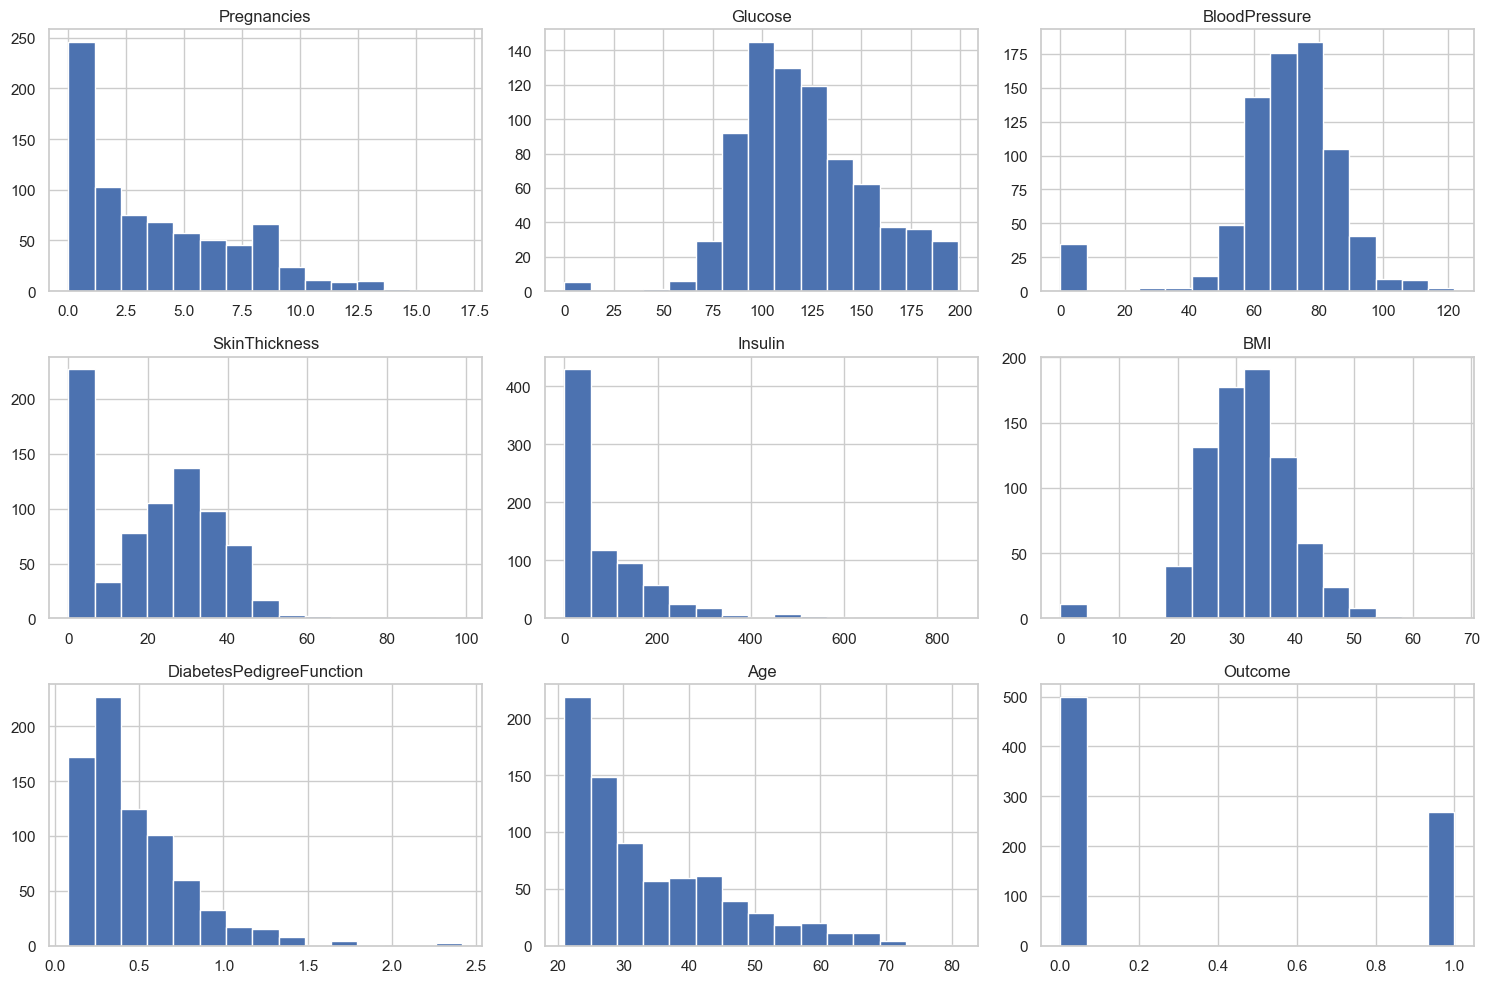

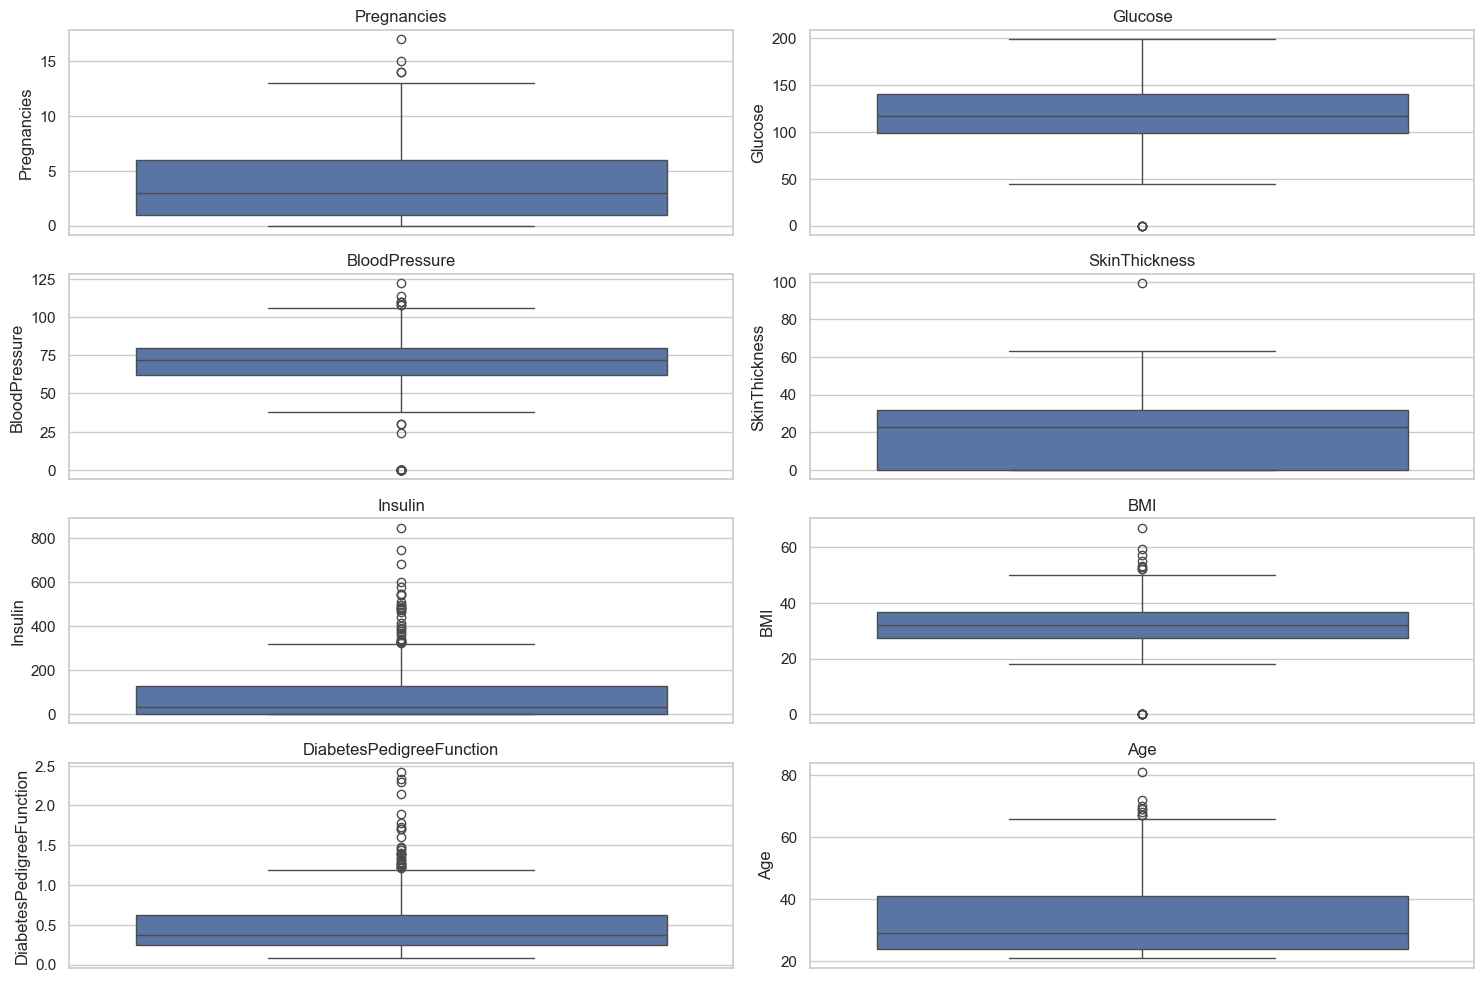

In [120]:
# Plot histograms for each feature
data.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Box plots to analyze the distribution and detect outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

Analysis:

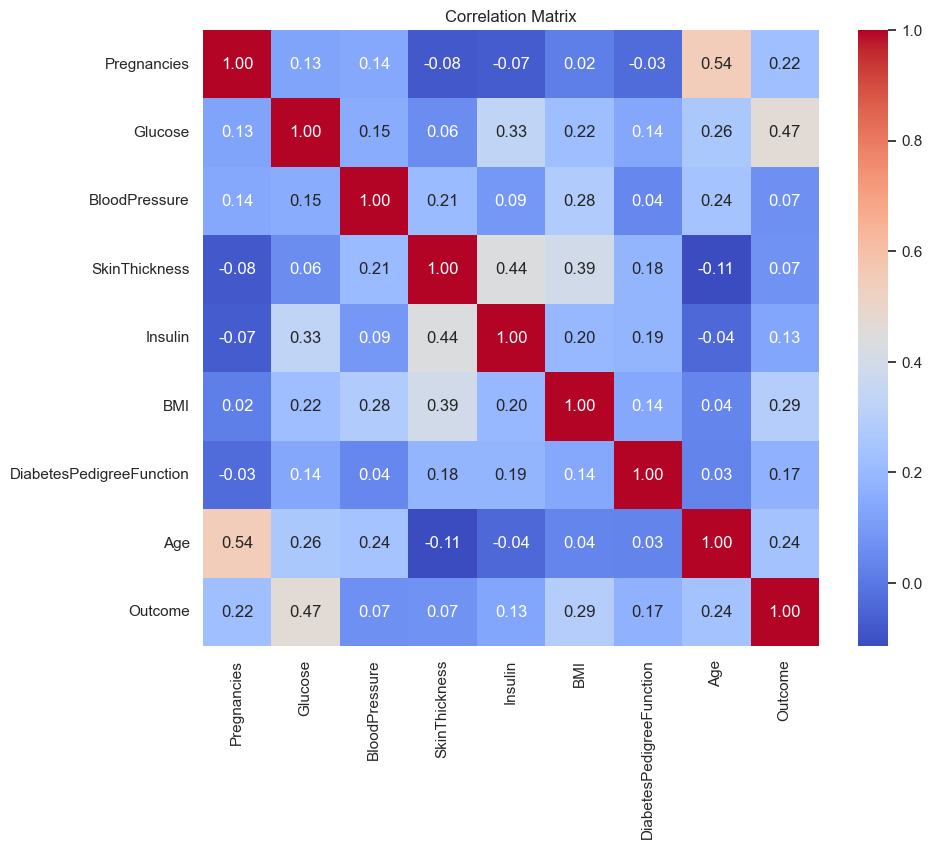

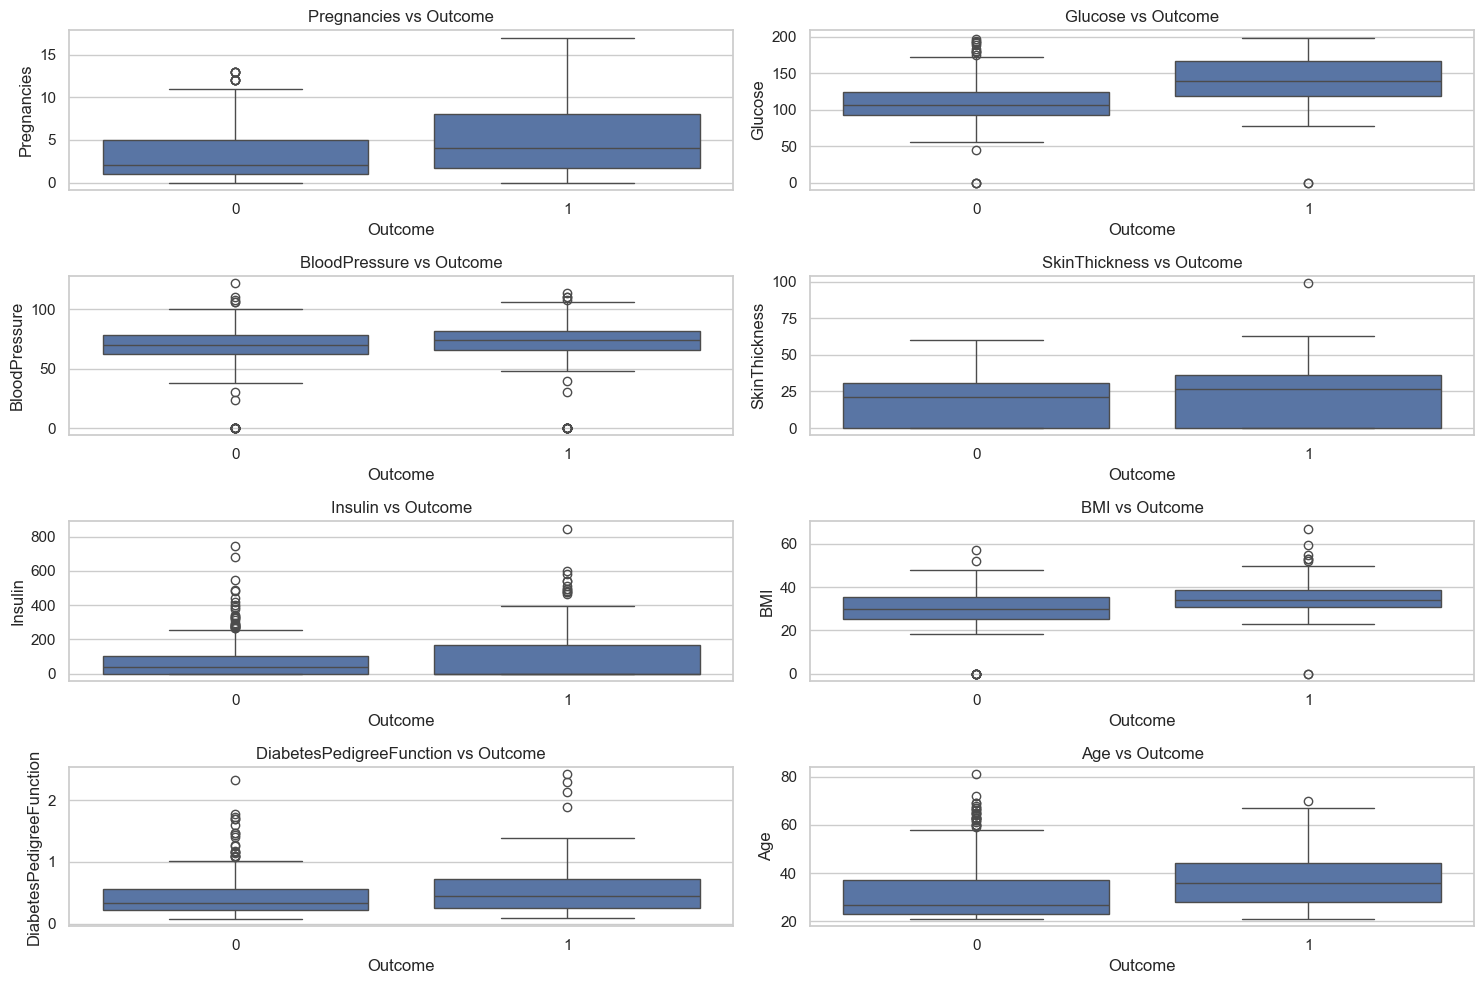

In [121]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Analyze features with respect to the target variable using box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x='Outcome', y=column, data=data)
    plt.title(f'{column} vs Outcome')
plt.tight_layout()
plt.show()

Analysis:

## Preprocessing

When preparing a dataset for analysis or machine learning, especially for a classification task like predicting diabetes outcomes, various preprocessing steps can enhance model performance and ensure data quality. Here are the usual preprocessing steps and their relevance to your diabetes dataset:

### Common Preprocessing Steps

1. **Handling Missing Values**:
   - **Methods**: Remove rows/columns with missing values or fill them with mean, median, or mode.
   - **Relevance**: Since we don't have any missing values, this is not needed.

2. **Outlier Detection and Treatment**:
   - **Methods**: Identify outliers using statistical methods (like Z-scores or IQR) and either remove or transform them.
   - **Relevance**: Outliers can skew the data, especially in features like Glucose and BMI. Handling them is crucial for better model performance.

3. **Feature Scaling**:
   - **Methods**: Normalize (min-max scaling) or standardize (z-score scaling) the features.
   - **Relevance**: Features like Glucose and Insulin have different scales. Either normalization or standardization ensures that the model treats each feature equally. This step is taken in the following sections.

4. **Encoding Categorical Variables**:
   - **Methods**: Use one-hot encoding or label encoding for categorical features.
   - **Relevance**: Since we don't have any categorical variables, this is not needed.

5. **Feature Selection**:
   - **Methods**: Use techniques like correlation analysis, recursive feature elimination, or feature importance from models.
   - **Relevance**: Since Glucose (47%), BMI (29%), Age (24%), and Pregnancies (22%) are more correlated as opposed to other features, these are enough.

6. **Balancing Data**:
   - **Methods**: Over-sampling the minority class (e.g., SMOTE) or under-sampling the majority class, or creating synthetic samples for the minority class.
   - **Relevance**: Since dataset is imbalanced with 250 instances of class 1 (diabetic) and 500 instances of class 0 (non-diabetic), balancing is needed.

In [123]:
data_preprocessed = deepcopy(data)

In [124]:
# Step 2: Outlier Detection and Treatment
# Capping the outliers at the 1st and 99th percentile
for column in data_preprocessed.columns[:-1]:  # Exclude the target variable
    lower_bound = data_preprocessed[column].quantile(0.01)
    upper_bound = data_preprocessed[column].quantile(0.99)
    data_preprocessed[column].clip(lower=lower_bound, upper=upper_bound)

In [125]:
data_preprocessed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [126]:
# Step 5: Feature Selection

correlation = data_preprocessed.corr()['Outcome'].drop('Outcome').abs()
print(correlation.sort_values(ascending=False))

# Keep features with correlation above a certain threshold (e.g., 0.1)
selected_features = correlation[correlation > 0.2].index.tolist()
print("Selected features:", selected_features)

# Final DataFrame with selected features
data_preprocessed = data_preprocessed[selected_features + ['Outcome']]

Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64
Selected features: ['Pregnancies', 'Glucose', 'BMI', 'Age']


In [127]:
data_preprocessed

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148,33.6,50,1
1,1,85,26.6,31,0
2,8,183,23.3,32,1
3,1,89,28.1,21,0
4,0,137,43.1,33,1
...,...,...,...,...,...
763,10,101,32.9,63,0
764,2,122,36.8,27,0
765,5,121,26.2,30,0
766,1,126,30.1,47,1


Here, we examine two methods of balancing data: 1) upsampling, and 2) downsampling.

In [131]:
# Step 6: Balancing Data

# Separate the majority and minority classes
data_preprocessed_majority = data_preprocessed[data['Outcome'] == 0]
data_preprocessed_minority = data_preprocessed[data['Outcome'] == 1]

# Over-sample the minority class
data_preprocessed_minority_upsampled = resample(data_preprocessed_minority, 
                                   replace=True,     # Sample with replacement
                                   n_samples=len(data_preprocessed_majority), # Match majority class size
                                   random_state=42)  # Set random state for reproducibility

# Combine the upsampled minority class with the majority class
data_preprocessed_upsampled = pd.concat([data_preprocessed_majority, data_preprocessed_minority_upsampled])

In [132]:
# Check the new class distribution
print("New class distribution after over-sampling:")
print(data_preprocessed_upsampled['Outcome'].value_counts())

New class distribution after over-sampling:
Outcome
0    500
1    500
Name: count, dtype: int64


In [133]:
# Under-sample the majority class
data_preprocessed_majority_downsampled = resample(data_preprocessed_majority, 
                                     replace=False,    # Sample without replacement
                                     n_samples=len(data_preprocessed_minority), # Match minority class size
                                     random_state=42) # Set random state for reproducibility

# Combine the downsampled majority class with the minority class
data_preprocessed_downsampled = pd.concat([data_preprocessed_majority_downsampled, data_preprocessed_minority])

In [134]:
# Check the new class distribution
print("New class distribution after under-sampling:")
print(data_preprocessed_downsampled['Outcome'].value_counts())

New class distribution after under-sampling:
Outcome
0    268
1    268
Name: count, dtype: int64


## Utils

In [140]:
def train_and_test_model(X_train, y_train, X_test):
    # Create a logistic regression model
    model = LogisticRegression(max_iter=1000)
    
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict on training data
    y_train_pred = model.predict(X_train)
    
    # Predict on testing data
    y_test_pred = model.predict(X_test)

    return y_train_pred, y_test_pred

In [141]:
def print_result(y_train, y_train_pred, y_test, y_test_pred):
    # Confusion matrix, accuracy, and precision for training data
    conf_matrix_train = confusion_matrix(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)

    # Confusion matrix, accuracy, and precision for testing data
    conf_matrix_test = confusion_matrix(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)

    # Display results
    print("Training Data Metrics:")
    print("Confusion Matrix:\n", conf_matrix_train)
    print("Accuracy:", accuracy_train)
    print("Precision:", precision_train)

    print("\nTesting Data Metrics:")
    print("Confusion Matrix:\n", conf_matrix_test)
    print("Accuracy:", accuracy_test)
    print("Precision:", precision_test)

In [142]:
def plot_conf_matrix(y_train, y_train_pred, y_test, y_test_pred):
    # Confusion matrix for training data
    conf_matrix_train = confusion_matrix(y_train, y_train_pred)

    # Confusion matrix for testing data
    conf_matrix_test = confusion_matrix(y_test, y_test_pred)

    # Plotting the confusion matrix for training data
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-Diabetic', 'Diabetic'], 
                yticklabels=['Non-Diabetic', 'Diabetic'])
    plt.title('Confusion Matrix - Training Data')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Plotting the confusion matrix for testing data
    plt.subplot(1, 2, 2)
    sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-Diabetic', 'Diabetic'], 
                yticklabels=['Non-Diabetic', 'Diabetic'])
    plt.title('Confusion Matrix - Testing Data')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.tight_layout()
    plt.show()

## Classification 

In [143]:
# Features and target
X_upsampled = data_preprocessed_upsampled.drop('Outcome', axis=1)
y_upsampled = data_preprocessed_upsampled['Outcome']

X_downsampled = data_preprocessed_downsampled.drop('Outcome', axis=1)
y_downsampled = data_preprocessed_downsampled['Outcome']

In [144]:
# Split the data into training and testing sets (80% train, 20% test)
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)
X_train_downsampled, X_test_downsampled, y_train_downsampled, y_test_downsampled = train_test_split(X_downsampled, y_downsampled, test_size=0.2, random_state=42)

In [148]:
y_train_pred_upsampled, y_test_pred_upsampled = train_and_test_model(X_train_upsampled, y_train_upsampled, X_test_upsampled)
y_train_pred_downsampled, y_test_pred_downsampled = train_and_test_model(X_train_downsampled, y_train_downsampled, X_test_downsampled)

In [149]:
print_result(y_train_upsampled, y_train_pred_upsampled, y_test_upsampled, y_test_pred_upsampled)
print("-----")
print_result(y_train_downsampled, y_train_pred_downsampled, y_test_downsampled, y_test_pred_downsampled)

Training Data Metrics:
Confusion Matrix:
 [[299 105]
 [124 272]]
Accuracy: 0.71375
Precision: 0.7214854111405835

Testing Data Metrics:
Confusion Matrix:
 [[74 22]
 [22 82]]
Accuracy: 0.78
Precision: 0.7884615384615384
-----
Training Data Metrics:
Confusion Matrix:
 [[158  51]
 [ 61 158]]
Accuracy: 0.7383177570093458
Precision: 0.7559808612440191

Testing Data Metrics:
Confusion Matrix:
 [[47 12]
 [13 36]]
Accuracy: 0.7685185185185185
Precision: 0.75


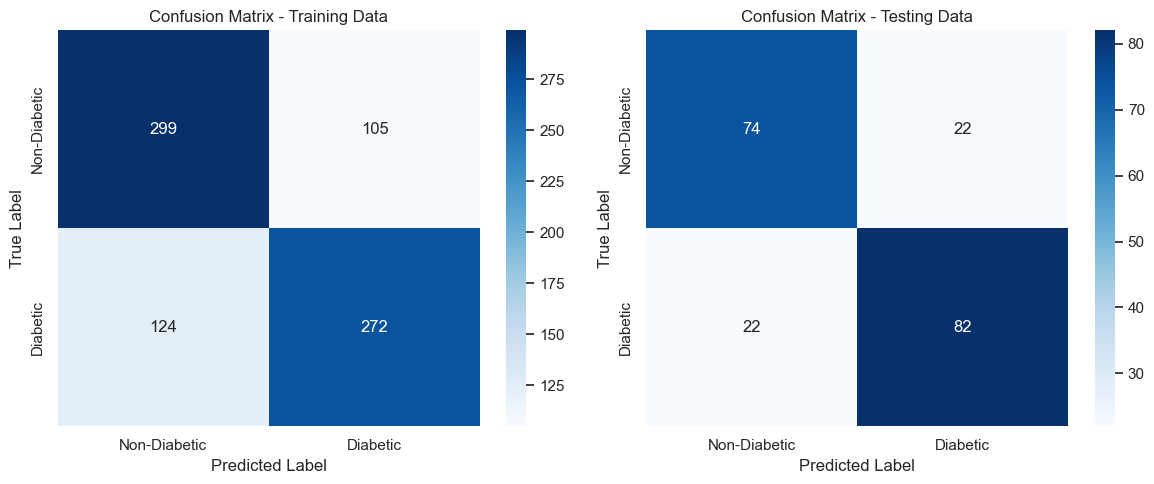

In [147]:
plot_conf_matrix(y_train_upsampled, y_train_pred_upsampled, y_test_upsampled, y_test_pred_upsampled)

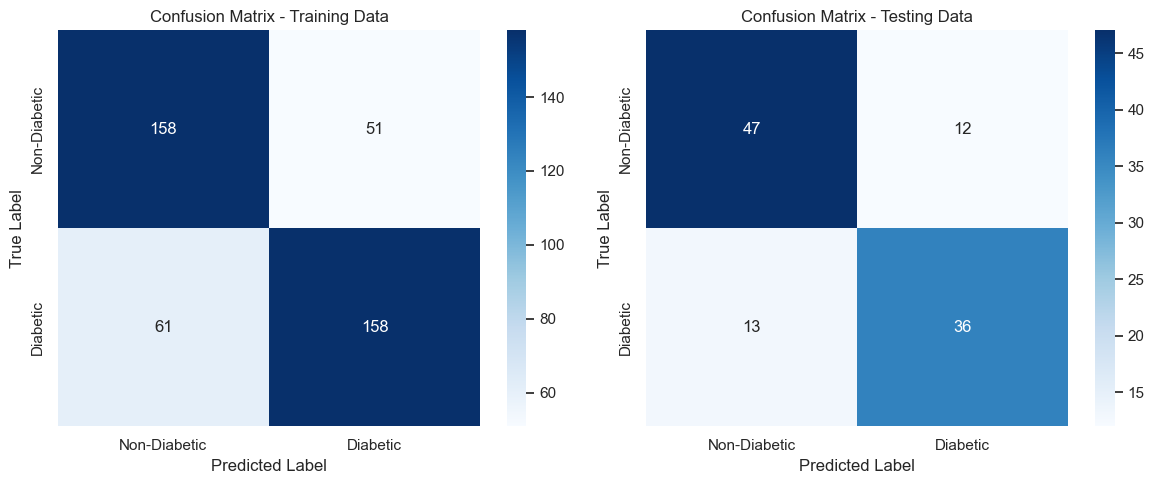

In [150]:
plot_conf_matrix(y_train_downsampled, y_train_pred_downsampled, y_test_downsampled, y_test_pred_downsampled)

## Normalization

In [155]:
# Step 3: Feature Scaling using Min-Max Normalization
scaler = MinMaxScaler()
features_upsampled = data_preprocessed_upsampled.drop('Outcome', axis=1)
features_downsampled = data_preprocessed_downsampled.drop('Outcome', axis=1)

target_upsampled = data_preprocessed_upsampled['Outcome'].values
target_downsampled = data_preprocessed_downsampled['Outcome'].values

features_upsampled_scaled = scaler.fit_transform(features_upsampled)
features_downsampled_scaled = scaler.fit_transform(features_downsampled)

# Create a new DataFrame with scaled features
data_preprocessed_upsampled_normalized = pd.DataFrame(features_upsampled_scaled, columns=features_upsampled.columns)
data_preprocessed_downsampled_normalized = pd.DataFrame(features_downsampled_scaled, columns=features_downsampled.columns)

data_preprocessed_upsampled_normalized['Outcome'] = target_upsampled
data_preprocessed_downsampled_normalized['Outcome'] = target_downsampled

In [156]:
data_preprocessed_upsampled_normalized.describe()

,Pregnancies,Glucose,BMI,Age,Outcome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.246529,0.624065,0.483703,0.221217,0.50000
std,0.209805,0.156977,0.113000,0.193729,0.50025
min,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.058824,0.512563,0.414307,0.066667,0.00000
50%,0.176471,0.613065,0.482861,0.166667,0.50000
75%,0.411765,0.723618,0.545455,0.350000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.00000


In [157]:
data_preprocessed_downsampled_normalized.describe()

,Pregnancies,Glucose,BMI,Age,Outcome
count,536.000000,536.000000,536.000000,536.000000,536.000000
mean,0.241769,0.628309,0.485745,0.255926,0.500000
std,0.202441,0.166996,0.116888,0.222953,0.500467
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.512563,0.421386,0.078431,0.000000
50%,0.176471,0.613065,0.487332,0.196078,0.500000
75%,0.411765,0.733668,0.548435,0.392157,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [158]:
# Features and target
X_upsampled_normalized = data_preprocessed_upsampled_normalized.drop('Outcome', axis=1)
y_upsampled_normalized = data_preprocessed_upsampled_normalized['Outcome']

X_downsampled_normalized = data_preprocessed_downsampled_normalized.drop('Outcome', axis=1)
y_downsampled_normalized = data_preprocessed_downsampled_normalized['Outcome']

In [168]:
# Split the data into training and testing sets (80% train, 20% test)
X_train_upsampled_normalized, X_test_upsampled_normalized, y_train_upsampled_normalized, y_test_upsampled_normalized = train_test_split(X_upsampled_normalized, y_upsampled_normalized, test_size=0.2, random_state=42)
X_train_downsampled_normalized, X_test_downsampled_normalized, y_train_downsampled_normalized, y_test_downsampled_normalized = train_test_split(X_downsampled_normalized, y_downsampled_normalized, test_size=0.2, random_state=42)

In [160]:
y_train_pred_upsampled_normalized, y_test_pred_upsampled_normalized = train_and_test_model(X_train_upsampled_normalized, y_train_upsampled_normalized, X_test_upsampled_normalized)
y_train_pred_downsampled_normalized, y_test_pred_downsampled_normalized = train_and_test_model(X_train_downsampled_normalized, y_train_downsampled_normalized, X_test_downsampled_normalized)

In [161]:
print_result(y_train_upsampled_normalized, y_train_pred_upsampled_normalized, y_test_upsampled_normalized, y_test_pred_upsampled_normalized)
print("-----")
print_result(y_train_downsampled_normalized, y_train_pred_downsampled_normalized, y_test_downsampled_normalized, y_test_pred_downsampled_normalized)

Training Data Metrics:
Confusion Matrix:
 [[299 105]
 [118 278]]
Accuracy: 0.72125
Precision: 0.7258485639686684

Testing Data Metrics:
Confusion Matrix:
 [[73 23]
 [21 83]]
Accuracy: 0.78
Precision: 0.7830188679245284
-----
Training Data Metrics:
Confusion Matrix:
 [[155  54]
 [ 60 159]]
Accuracy: 0.7336448598130841
Precision: 0.7464788732394366

Testing Data Metrics:
Confusion Matrix:
 [[44 15]
 [12 37]]
Accuracy: 0.75
Precision: 0.7115384615384616


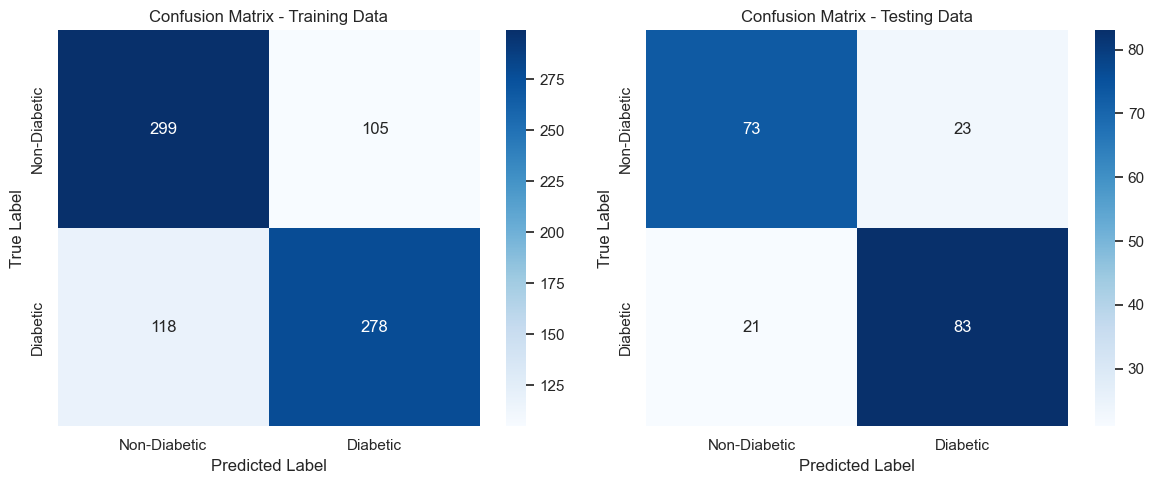

In [162]:
plot_conf_matrix(y_train_upsampled_normalized, y_train_pred_upsampled_normalized, y_test_upsampled_normalized, y_test_pred_upsampled_normalized)

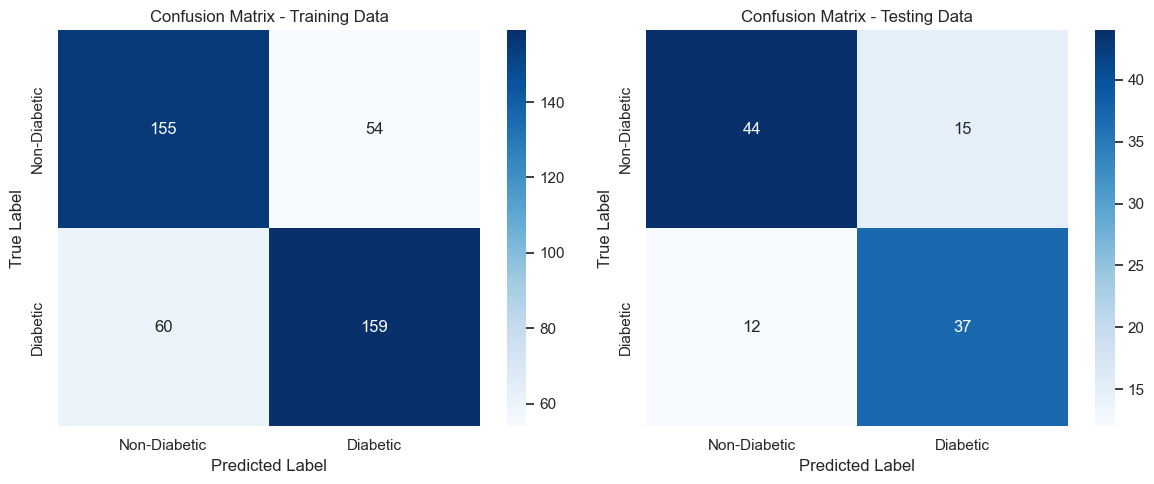

In [163]:
plot_conf_matrix(y_train_downsampled_normalized, y_train_pred_downsampled_normalized, y_test_downsampled_normalized, y_test_pred_downsampled_normalized)

## Standardization

In [ ]:
# Step 3: Feature Scaling using Min-Max Normalization
scaler = StandardScaler()
features_upsampled = data_preprocessed_upsampled.drop('Outcome', axis=1)
features_downsampled = data_preprocessed_downsampled.drop('Outcome', axis=1)

target_upsampled = data_preprocessed_upsampled['Outcome'].values
target_downsampled = data_preprocessed_downsampled['Outcome'].values

features_upsampled_scaled = scaler.fit_transform(features_upsampled)
features_downsampled_scaled = scaler.fit_transform(features_downsampled)

# Create a new DataFrame with scaled features
data_preprocessed_upsampled_standardized = pd.DataFrame(features_upsampled_scaled, columns=features_upsampled.columns)
data_preprocessed_downsampled_standardized = pd.DataFrame(features_downsampled_scaled, columns=features_downsampled.columns)

data_preprocessed_upsampled_standardized['Outcome'] = target_upsampled
data_preprocessed_downsampled_standardized['Outcome'] = target_downsampled

In [165]:
data_preprocessed_upsampled_standardized.describe()

,Pregnancies,Glucose,BMI,Age,Outcome
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.00000
mean,9.947598e-17,2.273737e-16,2.273737e-16,-3.126388e-16,0.50000
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,0.50025
min,-1.175629e+00,-3.977498e+00,-4.282692e+00,-1.142458e+00,0.00000
25%,-8.951160e-01,-7.106644e-01,-6.144334e-01,-7.981623e-01,0.00000
50%,-3.340906e-01,-7.010881e-02,-7.455274e-03,-2.817195e-01,0.50000
75%,7.879602e-01,6.345023e-01,5.467421e-01,6.650922e-01,1.00000
max,3.593087e+00,2.396030e+00,4.571271e+00,4.021970e+00,1.00000


In [167]:
data_preprocessed_downsampled_standardized.describe()

,Pregnancies,Glucose,BMI,Age,Outcome
count,5.360000e+02,5.360000e+02,5.360000e+02,5.360000e+02,536.000000
mean,5.302558e-17,-5.302558e-17,6.893325e-16,7.953837e-17,0.500000
std,1.000934e+00,1.000934e+00,1.000934e+00,1.000934e+00,0.500467
min,-1.195383e+00,-3.765929e+00,-4.159527e+00,-1.148965e+00,0.000000
25%,-9.045411e-01,-6.937563e-01,-5.511164e-01,-7.968523e-01,0.000000
50%,-3.228566e-01,-9.136949e-02,1.359517e-02,-2.686831e-01,0.500000
75%,8.405124e-01,6.314947e-01,5.368307e-01,6.115989e-01,1.000000
max,3.748935e+00,2.227820e+00,4.403669e+00,3.340473e+00,1.000000


In [169]:
# Features and target
X_upsampled_standardized = data_preprocessed_upsampled_standardized.drop('Outcome', axis=1)
y_upsampled_standardized = data_preprocessed_upsampled_standardized['Outcome']

X_downsampled_standardized = data_preprocessed_downsampled_standardized.drop('Outcome', axis=1)
y_downsampled_standardized = data_preprocessed_downsampled_standardized['Outcome']

In [170]:
# Split the data into training and testing sets (80% train, 20% test)
X_train_upsampled_standardized, X_test_upsampled_standardized, y_train_upsampled_standardized, y_test_upsampled_standardized = train_test_split(X_upsampled_standardized, y_upsampled_standardized, test_size=0.2, random_state=42)
X_train_downsampled_standardized, X_test_downsampled_standardized, y_train_downsampled_standardized, y_test_downsampled_standardized = train_test_split(X_downsampled_standardized, y_downsampled_standardized, test_size=0.2, random_state=42)

In [171]:
y_train_pred_upsampled_standardized, y_test_pred_upsampled_standardized = train_and_test_model(X_train_upsampled_standardized, y_train_upsampled_standardized, X_test_upsampled_standardized)
y_train_pred_downsampled_standardized, y_test_pred_downsampled_standardized = train_and_test_model(X_train_downsampled_standardized, y_train_downsampled_standardized, X_test_downsampled_standardized)

In [172]:
print_result(y_train_upsampled_standardized, y_train_pred_upsampled_standardized, y_test_upsampled_standardized, y_test_pred_upsampled_standardized)
print("-----")
print_result(y_train_downsampled_standardized, y_train_pred_downsampled_standardized, y_test_downsampled_standardized, y_test_pred_downsampled_standardized)

Training Data Metrics:
Confusion Matrix:
 [[299 105]
 [124 272]]
Accuracy: 0.71375
Precision: 0.7214854111405835

Testing Data Metrics:
Confusion Matrix:
 [[74 22]
 [22 82]]
Accuracy: 0.78
Precision: 0.7884615384615384
-----
Training Data Metrics:
Confusion Matrix:
 [[158  51]
 [ 61 158]]
Accuracy: 0.7383177570093458
Precision: 0.7559808612440191

Testing Data Metrics:
Confusion Matrix:
 [[47 12]
 [13 36]]
Accuracy: 0.7685185185185185
Precision: 0.75


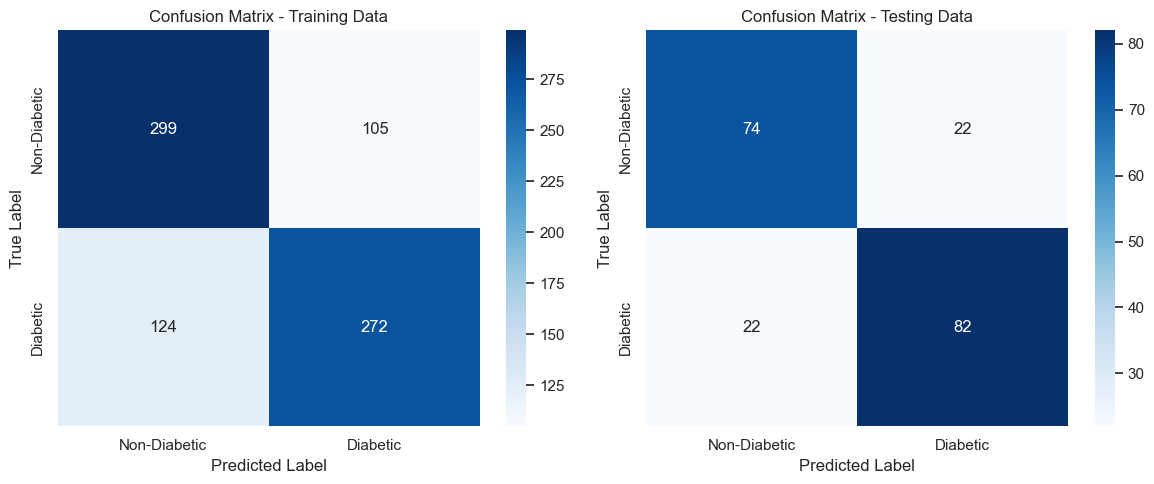

In [173]:
plot_conf_matrix(y_train_upsampled_standardized, y_train_pred_upsampled_standardized, y_test_upsampled_standardized, y_test_pred_upsampled_standardized)

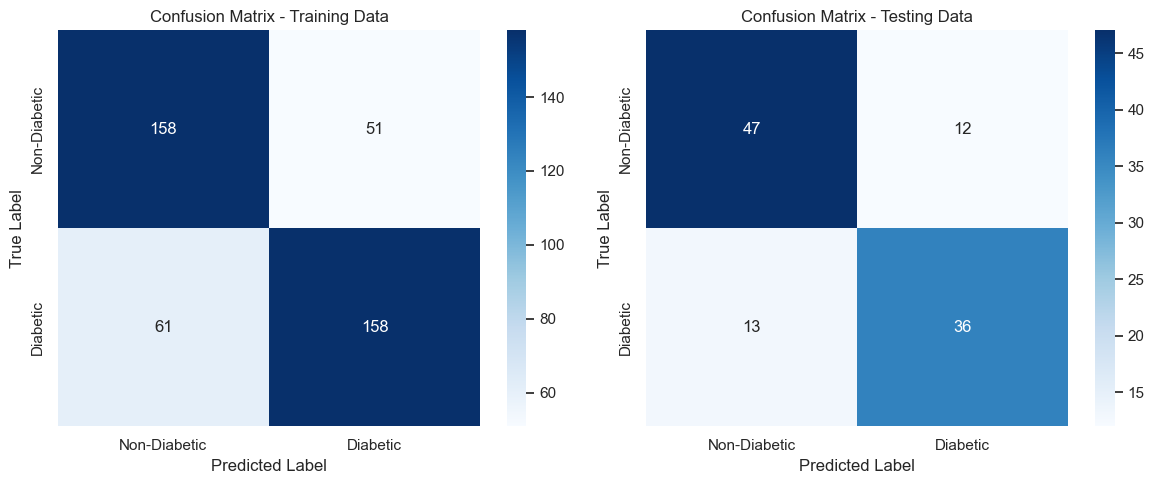

In [174]:
plot_conf_matrix(y_train_downsampled_standardized, y_train_pred_downsampled_standardized, y_test_downsampled_standardized, y_test_pred_downsampled_standardized)

## Comparison

### Upsampling vs. Downsampling

In [175]:
print_result(y_train_upsampled, y_train_pred_upsampled, y_test_upsampled, y_test_pred_upsampled)
print("-----")
print_result(y_train_downsampled, y_train_pred_downsampled, y_test_downsampled, y_test_pred_downsampled)

Training Data Metrics:
Confusion Matrix:
 [[299 105]
 [124 272]]
Accuracy: 0.71375
Precision: 0.7214854111405835

Testing Data Metrics:
Confusion Matrix:
 [[74 22]
 [22 82]]
Accuracy: 0.78
Precision: 0.7884615384615384
-----
Training Data Metrics:
Confusion Matrix:
 [[158  51]
 [ 61 158]]
Accuracy: 0.7383177570093458
Precision: 0.7559808612440191

Testing Data Metrics:
Confusion Matrix:
 [[47 12]
 [13 36]]
Accuracy: 0.7685185185185185
Precision: 0.75


In [176]:
print_result(y_train_upsampled_normalized, y_train_pred_upsampled_normalized, y_test_upsampled_normalized, y_test_pred_upsampled_normalized)
print("-----")
print_result(y_train_downsampled_normalized, y_train_pred_downsampled_normalized, y_test_downsampled_normalized, y_test_pred_downsampled_normalized)

Training Data Metrics:
Confusion Matrix:
 [[299 105]
 [118 278]]
Accuracy: 0.72125
Precision: 0.7258485639686684

Testing Data Metrics:
Confusion Matrix:
 [[73 23]
 [21 83]]
Accuracy: 0.78
Precision: 0.7830188679245284
-----
Training Data Metrics:
Confusion Matrix:
 [[155  54]
 [ 60 159]]
Accuracy: 0.7336448598130841
Precision: 0.7464788732394366

Testing Data Metrics:
Confusion Matrix:
 [[44 15]
 [12 37]]
Accuracy: 0.75
Precision: 0.7115384615384616


In [177]:
print_result(y_train_upsampled_standardized, y_train_pred_upsampled_standardized, y_test_upsampled_standardized, y_test_pred_upsampled_standardized)
print("-----")
print_result(y_train_downsampled_standardized, y_train_pred_downsampled_standardized, y_test_downsampled_standardized, y_test_pred_downsampled_standardized)

Training Data Metrics:
Confusion Matrix:
 [[299 105]
 [124 272]]
Accuracy: 0.71375
Precision: 0.7214854111405835

Testing Data Metrics:
Confusion Matrix:
 [[74 22]
 [22 82]]
Accuracy: 0.78
Precision: 0.7884615384615384
-----
Training Data Metrics:
Confusion Matrix:
 [[158  51]
 [ 61 158]]
Accuracy: 0.7383177570093458
Precision: 0.7559808612440191

Testing Data Metrics:
Confusion Matrix:
 [[47 12]
 [13 36]]
Accuracy: 0.7685185185185185
Precision: 0.75


Analysis:

### Standardization vs. Normalization vs. None

In [178]:
print_result(y_train_upsampled, y_train_pred_upsampled, y_test_upsampled, y_test_pred_upsampled)
print("-----")
print_result(y_train_upsampled_normalized, y_train_pred_upsampled_normalized, y_test_upsampled_normalized, y_test_pred_upsampled_normalized)
print("-----")
print_result(y_train_upsampled_standardized, y_train_pred_upsampled_standardized, y_test_upsampled_standardized, y_test_pred_upsampled_standardized)

Training Data Metrics:
Confusion Matrix:
 [[299 105]
 [124 272]]
Accuracy: 0.71375
Precision: 0.7214854111405835

Testing Data Metrics:
Confusion Matrix:
 [[74 22]
 [22 82]]
Accuracy: 0.78
Precision: 0.7884615384615384
-----
Training Data Metrics:
Confusion Matrix:
 [[299 105]
 [118 278]]
Accuracy: 0.72125
Precision: 0.7258485639686684

Testing Data Metrics:
Confusion Matrix:
 [[73 23]
 [21 83]]
Accuracy: 0.78
Precision: 0.7830188679245284
-----
Training Data Metrics:
Confusion Matrix:
 [[299 105]
 [124 272]]
Accuracy: 0.71375
Precision: 0.7214854111405835

Testing Data Metrics:
Confusion Matrix:
 [[74 22]
 [22 82]]
Accuracy: 0.78
Precision: 0.7884615384615384


In [179]:
print_result(y_train_downsampled, y_train_pred_downsampled, y_test_downsampled, y_test_pred_downsampled)
print("-----")
print_result(y_train_downsampled_normalized, y_train_pred_downsampled_normalized, y_test_downsampled_normalized, y_test_pred_downsampled_normalized)
print("-----")
print_result(y_train_downsampled_standardized, y_train_pred_downsampled_standardized, y_test_downsampled_standardized, y_test_pred_downsampled_standardized)

Training Data Metrics:
Confusion Matrix:
 [[158  51]
 [ 61 158]]
Accuracy: 0.7383177570093458
Precision: 0.7559808612440191

Testing Data Metrics:
Confusion Matrix:
 [[47 12]
 [13 36]]
Accuracy: 0.7685185185185185
Precision: 0.75
-----
Training Data Metrics:
Confusion Matrix:
 [[155  54]
 [ 60 159]]
Accuracy: 0.7336448598130841
Precision: 0.7464788732394366

Testing Data Metrics:
Confusion Matrix:
 [[44 15]
 [12 37]]
Accuracy: 0.75
Precision: 0.7115384615384616
-----
Training Data Metrics:
Confusion Matrix:
 [[158  51]
 [ 61 158]]
Accuracy: 0.7383177570093458
Precision: 0.7559808612440191

Testing Data Metrics:
Confusion Matrix:
 [[47 12]
 [13 36]]
Accuracy: 0.7685185185185185
Precision: 0.75


Analysis: